<Body>   
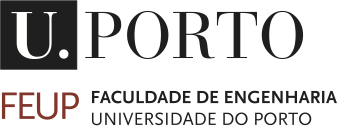   
<h1> <b>Computer Vision 2022/2023 - Assign 2 </b> </h1>
<p><b>João Henrique Torres Santos, Thaidy Deguchi </b> (up201806590@edu.fe.up.pt, up201802575@edu.fe.up.pt )</p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  
FEUP

---

## **1.Introduction**

This works aims to advance in the research of the master thesis proposal "Vision-based Smart Sprayer for Precision Farming".
The work expects to develop an intelligent sprayer
capable of covering a larger vegetation area with a single pulverization nozzle, by considering
a two-degree of freedom system. To control the mechanical system will be developed an
advanced perception system. This perception system will be capable detect the characteristics
of the foliage involved and applying the proper dose of pesticide, and after, significantly
decreasing the waste of pesticides to the necessary amount, making it less harmful to the
environment and the soil. Therefore, this solution aims to mitigate the handicaps presented
by the typical approaches today. Compiling, studying, and improving the principal solutions
in the precision agriculture area today are fundamental steps to achieve this.


## **2.Proposed**

We propose to study the implementation that will recognize leaves in a crop. The dataset contains 475 images from a real vineyard using a robot and manually annotated with four leaf area index classes in three regions of interest (ROIs) presented in the paper published by INESC TEC in this link https://www.mdpi.com/2079-9292/10/17/2061/htm. The value is inserted in the four classes: 0% leaves, 33% leaves, 66% leaves, or 100% leaves. When there are a few leaves, but in small quantities never exceeding half of the total area, it is 33%. If a large part of the area is covered with leaves, but not covered, it is considered 66%, and when the whole area is filled with leaves, it is considered a 100% class. To detect the leaves, we propose the following solution:

● Train the algorithm:
Using an SVM to train 80% of the algorithm and validate with the other 20%.

● Using two different approaches:
We will use the two descriptors, one with the best accuracy and another with the worst accuracy.

## **3.Theoretical Background of used methods**

## **3.1.Support Vector Machine(SVM)**

Support vector machines (or SVM, for short) are algorithms commonly used for supervised machine learning models. A key benefit they offer over other classification algorithms (such as the k-Nearest Neighbor algorithm) is the high degree of accuracy they provide.

In short, support vector machines separate data into different classes of data by using a hyperplane. This hyper-plane, as you’ll soon learn, is supported by the use of support vectors. These vectors are used to ensure that the margin of the hyper-plane is as large as possible[11].

Instead of calculating features from our input a priori, an SVM is capable of exctracting features directly from the data, exploiting existing patterns.

The basic idea of support vector machines is:

● Calculate an optimal hyperplane for linearly separable patterns;

● SVMs maximize the margin around the separating hyperplane. The decision between two classes is fully specified by a subset of training samples: the support vectors.

● Extend to patterns that are not linearly separable by transformations of original data to map into new space – the Kernel function

## **3.2.Local Binary Pattern**

LBP looks at points surrounding a central point and tests whether the surrounding points are greater than or less than the central point (i.e. gives a binary result).

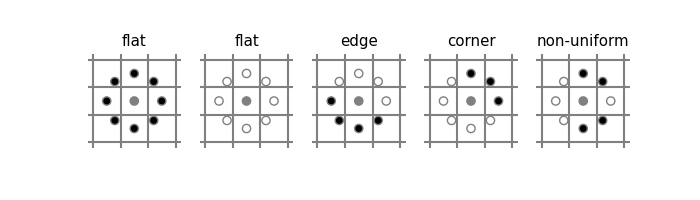

The figure above shows example results with black (or white) representing pixels that are less (or more) intense than the central pixel. When surrounding pixels are all black or all white, then that image region is flat (i.e. featureless). Groups of continuous black or white pixels are considered “uniform” patterns that can be interpreted as corners or edges. If pixels switch back-and-forth between black and white pixels, the pattern is considered “non-uniform”.

When using LBP to detect texture, you measure a collection of LBPs over an image patch and look at the distribution of these LBPs [1].

## **3.3.Green Leaf Index (GLI)**

The greenness index, also referred to as Green Leaf Index, represents the relation between the reflectance in the green channel compared to the other two visible light channels (red and blue).

It is computed as ((2*Rg) - Rr - Rb) / ((2*Rg) + Rr + Rb). The higher the green reflection compared to the other channels the lower the greenness index. 

GLI values range from -1 to +1. Negative values represent soil and non-living features, while positive values represent green leaves and stems. A value of -1 would represent a full reflection in the green channel and no reflection in the other two channels. 

The illustration below shows three different examples for the calculation of greenness. The X axis represents a simplified spectrum in the range from 400 to 1,000nm. The Y axis shows the relative reflectance for each wavelength. The colored blocks represent the measurement channels of PlantEye with standard configuration [2][3]. 

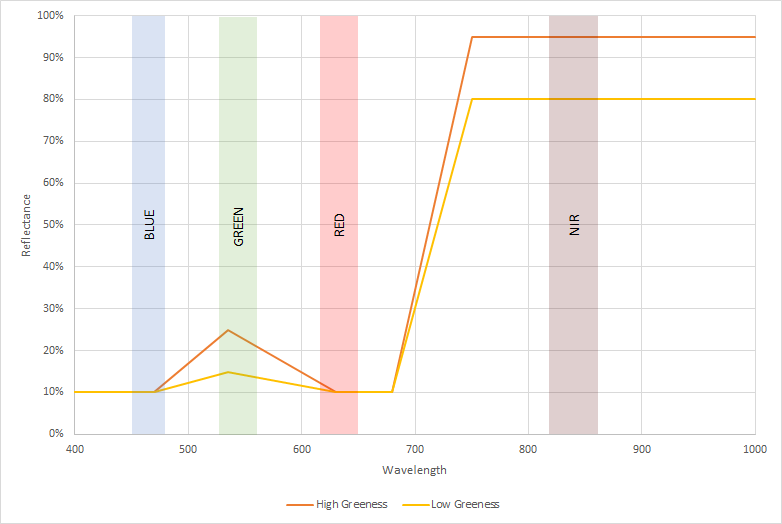

Besides the GLI method, there are other two. 
The RGBVI is defined as the normalized difference of the squared green
reflectance and the product of blue × red reflectance[6] and the NDRE is a method of measuring the amount of chlorophyll in the plants. The best time to apply NDRE is the mid-to-late growing season when the plants are mature and ready to be harvested. At this point, other indices would be less effective to use[7].

We did not use the other two vegetation index to present the results, but we ran background tests to validate the algorithm, the other results were delivered in the "results.txt" file.


## **4.Implementation**

We made a test considering four different approaches: LBP (59 bins), vegetation index (10 bins), average (2 bins), and hue (10 bins). In the dataset, there are 475 images, and as we have 3 ROIs, the total of samples to train and test are 1425.

For each sample, we defined the descriptors that we wanted to use and then applied the functions to calculate the histogram. The resulting histogram has all its components normalized to ensure that both have the same influence on the image characterization. To train the
SVM, 80% of the data was used, and the remaining 20% was used to validate and test its
performance [4][5].



## **4.1.Imports**

In [ ]:
import cv2
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import sklearn
from skimage import feature  # For local binary pattern 
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## **4.2.Functions implementation**

## **4.2.1.Local Binary Pattern**

In [ ]:
## LBP parameters ##
lbp_params = dict(points=8, radius=2, method="nri_uniform") ## creation of a dictionary fot the parameters

# LPB histogram for given img
def lbp_feature_correct(img, lbp_params):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) ## transform to grayscale
    lbp = feature.local_binary_pattern( gray, lbp_params["points"], lbp_params["radius"], lbp_params["method"] ) 
    n_bins = int(lbp.max() + 1)
    (hist, bins) = np.histogram(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins)) ## ravel similar to flatten
    return hist, lbp

## **4.2.2.Green Leaf Index**

In [ ]:
## calculate vegetation index
def calculate_index_expression(img_pixel, index_name):
    Rb = float(img_pixel[0]) ## Each channel of rgb
    Rg = float(img_pixel[1])
    Rr = float(img_pixel[2])

    if index_name == "ngrdi":
        try:
            result = (Rg - Rr) / (Rg + Rr)
        except ZeroDivisionError:
            result = 0
    elif index_name == "gli":
        try:
            result = ((2*Rg) - Rr - Rb) / ((2*Rg) + Rr + Rb)
        except ZeroDivisionError:
            result = 0
    elif index_name == "rgbvi":
        try:
            result = ((Rg*Rg) - (Rr*Rb)) / ((Rg*Rg) + (Rr*Rb))
        except ZeroDivisionError:
            result = 0

    return result
  

def calculate_vegetaion_index(img, index_name):
    data = img.shape
    #index histogram
    index_hist = np.zeros(10)
    #average histogram
    average_hist = np.zeros(2)
    average = 0
    average_green = 0
    count_pixels = 0
    for i in range(data[0]):
        for j in range(data[1]):
            index_value = calculate_index_expression(img[i,j], index_name)
            index_hist[int( (4.5 * index_value) + 4.5)] +=1
            
            #green component
            average_green+= float(img[i,i,1])            
            average+= ( (index_value+1) / 2)
            
            count_pixels +=1

    hist_sum = index_hist.sum()
    for i in range(len(index_hist)):
        index_hist[i] /= hist_sum

    #convert the media to a 0-1 scale
    #average_hist[0] = (average/count_pixels) 
    #average_hist[1] = (average_green/(count_pixels*255)) 
    
    #uncoment to not consider these averages
    average_hist = []

    #join vegetation index histogram with average histogram
    result_hist = np.concatenate((index_hist, average_hist), axis=None)        
    
    return result_hist


## **4.2.3.Hue Histogram**





In [ ]:
# Calculate de histogram of the H componente of the HSV image
def calculate_hue_histogram(img):
    #Hue range is [0,179]
    hue_hist = np.zeros(10)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## transform the color space

    data = img.shape
    for i in range(data[0]):
        for j in range(data[1]):
            hue_hist[int( (9/179) * hsv[i,j,0] )] +=1

    
    n_pixels = data[0] * data[1]
    #normalize the histogram
    for i in range(10):
        hue_hist[i] /= n_pixels
    
    return hue_hist

## **4.2.3.Descriptors definition**





In [ ]:
####### LBP #########
def descriptor_one(img):
    lbp_hist , _ = lbp_feature_correct(img, lbp_params)
    final_hist = np.concatenate((lbp_hist),axis=None)
    print(len(final_hist))
    return final_hist

###### LBP, GLI, HUE #######
def descriptor_nine(img):
    lbp_hist , _ = lbp_feature_correct(img, lbp_params)
    
    index_hist = calculate_vegetaion_index(img, "gli")

    hue_hist = calculate_hue_histogram(img)

    final_hist = np.concatenate((lbp_hist, index_hist, hue_hist),axis=None)
    print(len(final_hist))
    return final_hist

## **4.2.4.Features Collection**





In [ ]:
####Descriptor one - LPB
####Descriptor nine - LPB + GLI + HUE

f = open("features_one.txt", "w")  ## Declare the features files for the desired descriptor
f9 = open("features_nine.txt", "w")
count_line = 0

####Dataset with all annotations of the pictures
f_dataset = open("demofile.txt", "r")
line = f_dataset.readline() 

while(line != ''): ###Iterate between lines of the features
    array = line.split(' ')
    imageName = array[0]
    print("Nome da imagem" + imageName)
    img = cv2.imread("aveleda_2020_07_23_zed_images/" + imageName + ".jpg")
    
    #resize
    imgResized = cv2.resize(img, (640,480))
    
    cv2.imwrite("Dataset/"+ imageName + ".jpg", imgResized)
    #get 3 rectangles from the image
    #cv2.rectangle(imgResized, (227,10), (414, 150), (0,0,255), 2)
    rectangle1 = imgResized[10:150, 227:414]
    rectangle2 = imgResized[160:300, 227:414]
    rectangle3 = imgResized[310:450, 227:414]

    final_hist = descriptor_one(rectangle1)
    final_hist_nine = descriptor_nine(rectangle1)

    #save the final histogram
    np.savetxt(f, final_hist, newline=' ')
    f.write("\n")
    np.savetxt(f9, final_hist_nine, newline=' ')
    f9.write("\n")
    count_line+=1
    
    final_hist = descriptor_one(rectangle2)
    final_hist_nine = descriptor_nine(rectangle2)

    #save the final histogram
    np.savetxt(f, final_hist, newline=' ')
    f.write("\n")
    np.savetxt(f9, final_hist_nine, newline=' ')
    f9.write("\n")
    count_line+=1

    final_hist = descriptor_one(rectangle3)
    final_hist_nine = descriptor_nine(rectangle3)

    #save the final histogram
    np.savetxt(f, final_hist, newline=' ')
    f.write("\n")
    np.savetxt(f9, final_hist_nine, newline=' ')
    f9.write("\n")
    count_line+=1

    cv2.destroyAllWindows()
    
    line = f_dataset.readline()

print("Linhas guardadas "+ str(count_line))


Nome da imagemleft12850
59
79
59
79
59
79
Nome da imagemleft12855
59
79
59
79
59
79
Nome da imagemleft12860
59
79
59
79
59
79
Nome da imagemleft12865
59
79
59
79
59
79
Nome da imagemleft12870
59
79
59
79
59
79
Nome da imagemleft12875
59
79
59
79
59
79
Nome da imagemleft12880
59
79
59
79
59
79
Nome da imagemleft12885
59
79
59
79
59
79
Nome da imagemleft12890
59
79
59
79
59
79
Nome da imagemleft12895
59
79
59
79
59
79
Nome da imagemleft12900
59
79
59
79
59
79
Nome da imagemleft12905
59
79
59
79
59
79
Nome da imagemleft12910
59
79
59
79
59
79
Nome da imagemleft12915
59
79
59
79
59
79
Nome da imagemleft12920
59
79
59
79
59
79
Nome da imagemleft12925
59
79
59
79
59
79
Nome da imagemleft12930
59
79
59
79
59
79
Nome da imagemleft12935
59
79
59
79
59
79
Nome da imagemleft12940
59
79
59
79
59
79
Nome da imagemleft12945
59
79
59
79
59
79
Nome da imagemleft12950
59
79
59
79
59
79
Nome da imagemleft12955
59
79
59
79
59
79
Nome da imagemleft12960
59
79
59
79
59
79
Nome da imagemleft12965
59
79
59
7

## **4.2.5.Results**





We can define:


1.   
Accuracy: tells us what proportion of the data points we predicted correctly. The biggest and most well known problem with accuracy is when you have imbalanced datasets.

2.  
Recall: is the share of the actual positive cases which we predict correctly.

3. Precision: It is the share of the predicted positive cases which are correct.

4. F1 score: the harmonic mean of recall and precision, i.e. It reaches its optimum 1 only if precision and recall are both at 100%. And if one of them equals 0, then also F1 score has its worst value 0. If false positives and false negatives are not equally bad for the use case, Fᵦ is suggested, which is a generalization of F1 score[8][9][10][12].



*   Precision = TP / (TP+FP)
*   Recall = TP / (TP+FN)
*   Accuracy =  (TP+TN) / (TP+FN+FP+TN)
*   F1 = 2 * (precision*recall / precision+recall)


In [ ]:
#function to append the values to each class
def label_to_percentage(label_list):
    percentage_list = []
    for i in label_list:
        if i == 0:
            percentage_list.append(0)
        elif i == 1:
            percentage_list.append(33)
        elif i == 2:
            percentage_list.append(66)
        elif i == 3:
            percentage_list.append(100)
    return percentage_list

def plot_confusion_matrix(labels, pred_labels):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    cm = confusion_matrix(labels, pred_labels,  sample_weight=None, normalize='true');
    cm = ConfusionMatrixDisplay(cm, display_labels =classes);
    cm.plot(values_format='f', cmap='Blues', ax=ax)

classes = ('0', '33', '66', '100')

1140
285

F1 Score Macro of the worst descriptor:  0.7738123975934199

F1 Score Micro of the worst descriptor:  0.8000000000000002

F1 Score Weighted of the worst descriptor:  0.8004985522476082

Labels score of the worst descriptor:  [0.90265487 0.60377358 0.80833333 0.7804878 ]

Accuracy score of the worst descriptor:  0.8

Diagonal area: 0.7793771610857282


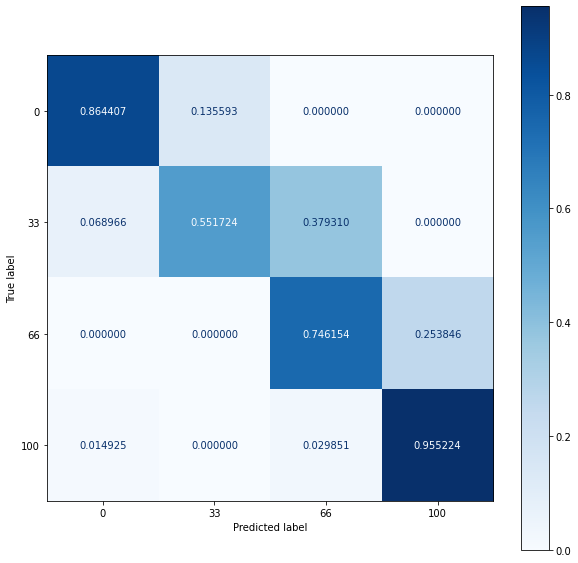

In [ ]:
feature_list = []
label_list = []
image_name_list = []
line_aux_list = []
f_features = open("features_one.txt", "r")

#read features file
line = f_features.readline()
while line != '':

    array = line.split(' ')
    array.pop()
    feature_list.append(array)
    line = f_features.readline()

#read dataset file
f_dataset = open("demofile.txt", "r")

line = f_dataset.readline()
while line != '': #search the values to append to each class
    line_aux_list.append(line)
    array = line.split(' ')
    image_name_list.append(array[0])
    array.pop(0)
    array.pop()
    for i in array:
        if i == '0':
            i = 0
        elif i == '33':
            i = 1
        elif i == '66':
            i = 2
        elif i == '100':
            i = 3
        else:
            print(i)
            print("ERROR:Invalid value")

        label_list.append(i)

    line = f_dataset.readline()

#separate in training and testing data

data_train = feature_list[285:len(feature_list)]
data_label_train = label_list[285:len(feature_list)]

data_test = feature_list[:285]
data_label_test = label_list[:285]



print(len(data_train))
print(len(data_test))


# Sequentially apply a list of transforms and a final estimator. 
# Intermediate steps of the pipeline must be ‘transforms’, that is, 
# they must implement fit and transform methods. The final estimator only needs to implement fit. 
# The transformers in the pipeline can be cached using memory argument.


# Construct a Pipeline from the given estimators.
# C-Support Vector Classification.

clf = make_pipeline(StandardScaler(), SVC(C=1,gamma='auto'))  
clf.fit(data_train, data_label_train)
results = clf.predict(data_test) ## Results of the SVM preds

score = f1_score(data_label_test, results, average='macro') #an arithmetic mean of the per-class F1-scores. We gave equal weights to each class
print("\nF1 Score Macro of the worst descriptor: ", score)

score = f1_score(data_label_test, results, average='micro') #look at all the samples together, equal to accuracy
print("\nF1 Score Micro of the worst descriptor: ", score)

score = f1_score(data_label_test, results, average='weighted')  #we weight the F1-score of each class by the number of samples from that class
print("\nF1 Score Weighted of the worst descriptor: ", score)

score = f1_score(data_label_test, results, average=None)
print("\nLabels score of the worst descriptor: ", score)

acc_score = accuracy_score(data_label_test, results)
print("\nAccuracy score of the worst descriptor: ", acc_score)


list_range = 285/3
data_index = 0
i=list_range # colocar aqui um 0 para mostar imagens

x = 0
results_percentage = label_to_percentage(results)
data_label_test_percentage = label_to_percentage(data_label_test)
matrix = confusion_matrix(data_label_test, results, sample_weight=None, normalize='true')
diagonal_area = 0
for i in range(4):
    diagonal_area += matrix[i][i]


    
plot_confusion_matrix(data_label_test, results)
print("\nDiagonal area:", (diagonal_area/4))


1140
285

F1 Score Macro of the best descriptor:  0.7689083963887896

F1 Score Micro of the best descriptor:  0.8140350877192982

F1 Score Weighted of the best descriptor:  0.8110253258743586

Labels score of the best descriptor:  [0.91071429 0.52       0.82730924 0.81761006]

Accuracy score of the best descriptor:  0.8140350877192982

Diagonal area: 0.7687848969422545


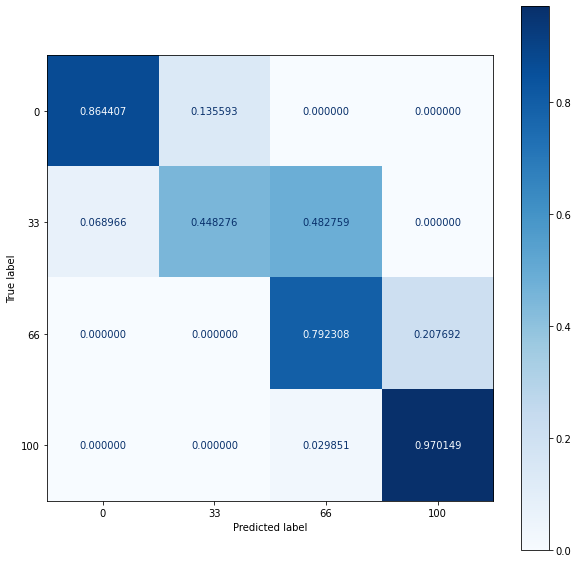

In [ ]:
feature_list = []
label_list = []
image_name_list = []
line_aux_list = []
f_features = open("features_nine.txt", "r")

#read features file
line = f_features.readline()
while line != '':

    array = line.split(' ')
    array.pop()
    feature_list.append(array)
    line = f_features.readline()

#read dataset file
f_dataset = open("demofile.txt", "r")

line = f_dataset.readline()
while line != '': #search the values to append to each class
    line_aux_list.append(line)
    array = line.split(' ')
    image_name_list.append(array[0])
    array.pop(0)
    array.pop()
    for i in array:
        if i == '0':
            i = 0
        elif i == '33':
            i = 1
        elif i == '66':
            i = 2
        elif i == '100':
            i = 3
        else:
            print(i)
            print("ERROR:Invalid value")

        label_list.append(i)

    line = f_dataset.readline()

#separate in training and testing data

data_train = feature_list[285:len(feature_list)]
data_label_train = label_list[285:len(feature_list)]

data_test = feature_list[:285]
data_label_test = label_list[:285]



print(len(data_train))
print(len(data_test))


# Sequentially apply a list of transforms and a final estimator. 
# Intermediate steps of the pipeline must be ‘transforms’, that is, 
# they must implement fit and transform methods. The final estimator only needs to implement fit. 
# The transformers in the pipeline can be cached using memory argument.


# Construct a Pipeline from the given estimators.
# C-Support Vector Classification.

clf = make_pipeline(StandardScaler(), SVC(C=1,gamma='auto'))  
clf.fit(data_train, data_label_train)
results = clf.predict(data_test) ## Results of the SVM preds

score = f1_score(data_label_test, results, average='macro') #an arithmetic mean of the per-class F1-scores. We gave equal weights to each class
print("\nF1 Score Macro of the best descriptor: ", score)

score = f1_score(data_label_test, results, average='micro') #look at all the samples together, equal to accuracy
print("\nF1 Score Micro of the best descriptor: ", score)

score = f1_score(data_label_test, results, average='weighted')  #we weight the F1-score of each class by the number of samples from that class
print("\nF1 Score Weighted of the best descriptor: ", score)

score = f1_score(data_label_test, results, average=None)
print("\nLabels score of the best descriptor: ", score)

acc_score = accuracy_score(data_label_test, results)
print("\nAccuracy score of the best descriptor: ", acc_score)


list_range = 285/3
data_index = 0
i=list_range # colocar aqui um 0 para mostar imagens

x = 0
results_percentage = label_to_percentage(results)
data_label_test_percentage = label_to_percentage(data_label_test)
matrix = confusion_matrix(data_label_test, results, sample_weight=None, normalize='true')
diagonal_area = 0
for i in range(4):
    diagonal_area += matrix[i][i]


    
plot_confusion_matrix(data_label_test, results)
print("\nDiagonal area:", (diagonal_area/4))


We obtained two main scores: F1 score and Average Accuracy.
The accuracy was obtained by summing all diagonal values from the
confusion matrix and dividing the result by four (average accuracy value). For example, the accuracy for descriptor 9 is the result of summing the diagonal values of the confusion matrix and
dividing by four.

All configurations have an accuracy lower than 90%, which is justified by the proximity between classes. For example, we can observe that the classification confuses class 33% with class 0%. This can be found in the intersection region between these two classes. For example, the 0% class is never identified as 66% or 100%.
The 33% class is only confused with the 0% and 66% classes.

## **5.Conclusion and Future work**

The SVM code works and has good scores although it can be improved. We can see that the algorithm confuses itself with adjacent classes. 
First of all, the descriptors can be updated to increase the accuracy, that is, include other leaf index features to identify more types of vegetation.
Second, updating and increasing the dataset size can be very useful when it comes to classification problems. With considerably more data we can increase the number of classes and then achieve more precision in the spray.

## **References**

[1]. https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_local_binary_pattern.html

[2]. https://www.l3harrisgeospatial.com/docs/BroadbandGreenness.html#Green6

[3]. https://phenospex.helpdocs.com/plant-parameters/greeness#:~:text=Value%20Range%3A%20-1%E2%80%93%201%20The%20greenness%20index%2C%20also,and%20blue%29.%20It%20is%20computed%20as%20%282%2AG-R-B%29%2F%20%282%2AR%2BG%2BB%29.

[4]. 	BALTAZAR, A.R., AGUIAR, A., MAGALHÃES, S., SANTOS, L. Vineyard dataset with anotation of leaf density - for precision spraying [dataset]. 27 may 2021. INESC TEC research data repository. DOI: https://doi.org/10.25747/b44j-q034

[5]. https://www.mdpi.com/2079-9292/10/17/2061/review_report

[6]. Juliane Bendig, Kang Yu, Helge Aasen, Andreas Bolten, Simon Bennertz, Janis Broscheit, Martin L. Gnyp, Georg Bareth,
Combining UAV-based plant height from crop surface models, visible, and near infrared vegetation indices for biomass monitoring in barley,
International Journal of Applied Earth Observation and Geoinformation,
Volume 39,
2015,
Pages 79-87,
ISSN 1569-8432,
https://doi.org/10.1016/j.jag.2015.02.012.
(https://www.sciencedirect.com/science/article/pii/S0303243415000446)

[7].https://eos.com/industries/agriculture/ndre/#:~:text=Normalized%20difference%20red%20edge%20index%20%28NDRE%20for%20short%29,other%20indices%20would%20be%20less%20effective%20to%20use.

[8]. https://inside.getyourguide.com/blog/2020/9/30/what-makes-a-good-f1-score

[9]. https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd

[10]. https://stephenallwright.com/good-f1-score/

[11]. https://datagy.io/python-support-vector-machines/

[12]. https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1#:~:text=F1-score%20is%20computed%20using%20a%20mean%20%28%E2%80%9Caverage%E2%80%9D%29%2C%20but,71.4%25%29%20%2F%20%2883.3%25%20%2B%2071.4%25%29%20%3D%2076.9%25%20
